# Objective Project

Pada project ini, kita akan mencoba untuk membuat model dari data training untuk mengklasifikasikan data_uji menggunakan algoritma logistic regression.




1. Objective

Kita ingin melihat dengan fitur yang dimiliki apakah penumpang tersebut akan selamat atau tidak.

# Library Package

In [ ]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import pandas as pd
import sklearn.feature_selection as fs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

2. Data Collection


In [ ]:
#panggil data dan masukkan pada dua variabel data_mentah untuk train dan data_uji untuk data_uji
data_mentah = pd.read_csv('train.csv')
data_uji = pd.read_csv('data_uji.csv')

In [ ]:
data_mentah.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [ ]:
data_uji.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


3. Data Preparation

Pada bagian ini kita akan melakukan checking detail data terlebih dahulu yang bernilai nan value lalu memperbaiki nan value

In [ ]:
print(data_mentah.isnull().sum())
display(data_mentah.describe())

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


In [ ]:
print(data_uji.isnull().sum())
display(data_uji.describe())

Age             0
Cabin          10
Embarked        0
Fare            0
Name            0
Parch           0
PassengerId     0
Pclass          0
Sex             0
SibSp           0
Survived       10
Ticket          0
Title           0
Family_Size     0
dtype: int64


,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,10.000000,0.0,10.000000,10.000000,10.00000,10.000000,10.000000,0.0,10.000000
mean,30.150000,NaN,12.270010,0.200000,896.50000,2.800000,0.500000,NaN,0.700000
std,14.541225,NaN,7.777627,0.421637,3.02765,0.421637,0.707107,NaN,0.948683
min,14.000000,NaN,7.000000,0.000000,892.00000,2.000000,0.000000,NaN,0.000000
25%,21.250000,NaN,7.679200,0.000000,894.25000,3.000000,0.000000,NaN,0.000000
50%,26.500000,NaN,8.943750,0.000000,896.50000,3.000000,0.000000,NaN,0.000000
75%,33.375000,NaN,11.637500,0.000000,898.75000,3.000000,1.000000,NaN,1.750000
max,62.000000,NaN,29.000000,1.000000,901.00000,3.000000,2.000000,NaN,2.000000


Terlihat untuk data cabin memiliki banyak nilai NaN. Jadi akan kita drop data tersebut. Name, Ticket, Title juga akan kita drop karena memiliki banyak nilai unik dan berbentuk string.

In [ ]:
#drop kolom yang tidak dibutuhkan dari kedua dataframe
data_mentah.drop(columns=['Cabin','Name','Ticket','Title'], inplace=True)
data_uji.drop(columns=['Cabin','Name','Ticket','Title'], inplace=True)

In [ ]:
data_mentah.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,22.0,S,7.2500,0,1,3,male,1,0.0,1
1,38.0,C,71.2833,0,2,1,female,1,1.0,1
2,26.0,S,7.9250,0,3,3,female,0,1.0,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,1
4,35.0,S,8.0500,0,5,3,male,0,0.0,0


In [ ]:
data_uji.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,34.5,Q,7.8292,0,892,3,male,0,NaN,0
1,47.0,S,7.0000,0,893,3,female,1,NaN,1
2,62.0,Q,9.6875,0,894,2,male,0,NaN,0
3,27.0,S,8.6625,0,895,3,male,0,NaN,0
4,22.0,S,12.2875,1,896,3,female,1,NaN,2


Selanjutnya kita akan Lalu mengubah kedua dataframe dengan nilai male menjadi 0 dan female menjadi 1 pada kolom Sex. S = 1, C = 2, Q = 3 pada kolom embarked.

In [ ]:
data_mentah.replace({'male':0, 'female':1,
                     'S':1, 'C':2, 'Q':3}, inplace=True)
data_uji.replace({'male':0, 'female':1,
                     'S':1, 'C':2, 'Q':3}, inplace=True)
data_mentah.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,22.0,1,7.2500,0,1,3,0,1,0.0,1
1,38.0,2,71.2833,0,2,1,1,1,1.0,1
2,26.0,1,7.9250,0,3,3,1,0,1.0,0
3,35.0,1,53.1000,0,4,1,1,1,1.0,1
4,35.0,1,8.0500,0,5,3,0,0,0.0,0


Sekarang kita akan membagi data_mentah menjadi data training dan test


In [ ]:
#pilih data yang akan menjadi fitur dan label. gunakan data_mentah karena kita akan membuat model
X = None
y = None

In [ ]:
X = data_mentah.drop(['Survived'], axis=1)
y = data_mentah['Survived']

In [ ]:
model_lr = LogisticRegression()
rfe = fs.RFE(model_lr)
rfe.fit(X,y)
print(f'Support = {rfe.support_}')
print(f'Ranking = {rfe.ranking_}')

Support = [False  True False False False  True  True  True False]
Ranking = [4 1 5 3 6 1 1 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#sekarang kita ubah nilai X dengan mengikuti nilai kolom terbaik yang berangking 1. urutan pada list ranking sesuai urutan pada saat inisiasi variabel X

X = data_mentah[['Embarked','Pclass','Sex','SibSp']]

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=20, test_size=0.2)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 712
dimensi dari y_train : 712
dimensi dari X_test : 179
dimensi dari y_test : 179


# Data Processing

4. Data Processing

Melakukan training model logistic regression menggunakan data yang sebelumnya sudah dibuat untuk dilatih (train) dan diuji (test).

Dan selanjutnya akan melakukan evaluasi metric terhadap hasil pemodelan yang telah dilakukan.

In [ ]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = model_lr.predict(X_test)

auc = metrics.accuracy_score(y_test, y_predict)
print(f'Nilai AUC : {auc}')

Nilai AUC : 0.8547486033519553


Nilai AUC = 0.8 yang mendekati nilai 1 menunjukkan akurasi dari model bagus. Sekarang kita akan mencoba mengklasifikasikan/men-predict menggunakan data_uji kita terhadap pemodelan yang telah kita latih.

In [ ]:
data_uji_X = data_uji[['Embarked','Pclass','Sex','SibSp']]
y_predict_uji = model_lr.predict(data_uji_X)

target_predict = pd.DataFrame({'Survived': list(y_predict_uji)})
data_uji['Survived'] = target_predict
data_uji

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,34.5,3,7.8292,0,892,3,0,0,0.0,0
1,47.0,1,7.0000,0,893,3,1,1,1.0,1
2,62.0,3,9.6875,0,894,2,0,0,0.0,0
3,27.0,1,8.6625,0,895,3,0,0,0.0,0
4,22.0,1,12.2875,1,896,3,1,1,1.0,2
5,14.0,1,9.2250,0,897,3,0,0,0.0,0
6,30.0,3,7.6292,0,898,3,1,0,1.0,0
7,26.0,1,29.0000,1,899,2,0,1,0.0,2
8,18.0,2,7.2292,0,900,3,1,0,1.0,0
9,21.0,1,24.1500,0,901,3,0,2,0.0,2


# Sumarry/Report/Analyze

In [ ]:
data = data_mentah.append(data_uji)
data['Sex'].replace({0:'male', 1:'female'}, inplace=True)
data.reset_index(drop='index', inplace=True)

In [ ]:
frame = pd.DataFrame(data=data_mentah, columns=['Sex','Survived'])
frame['Sex'].replace({0:'male', 1:'female'}, inplace=True)

In [ ]:
feature = pd.DataFrame(columns=['Sex','Survived (Confirmed)','Not_Survived (Confirmed)','Survived (Predict)','Not_Survived (Predict)'])
feature['Sex'] = ['female','male']
feature['Survived (Confirmed)'] = frame[frame['Survived']==1.0].value_counts().values
feature['Not_Survived (Confirmed)'] = frame[frame['Survived']==0.0].value_counts().sort_index().values
feature['Survived (Predict)'] = [4,0]
feature['Not_Survived (Predict)'] = [0,6]
feature.set_index('Sex', inplace=True)
feature

,Survived (Confirmed),Not_Survived (Confirmed),Survived (Predict),Not_Survived (Predict)
Sex,,,,
female,233,81,4,0
male,109,468,0,6


Figure 1:



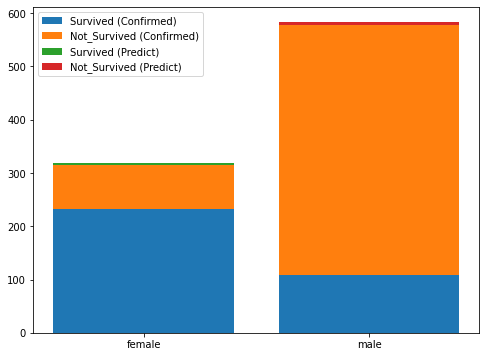


Figure 2:



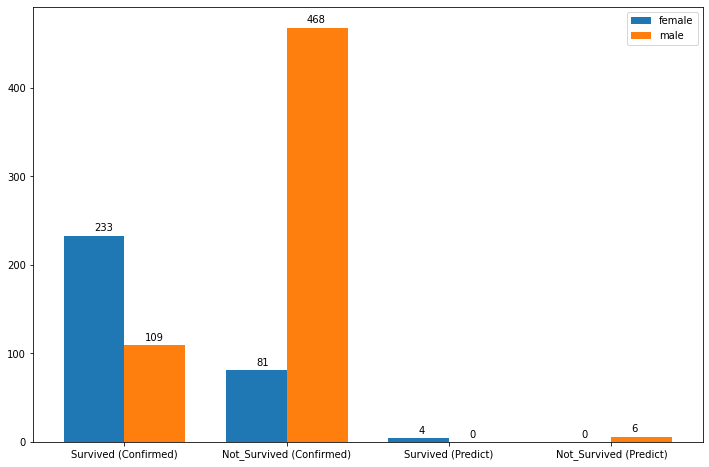


DESCRIPTIVE RESULT:

Total Survived / Not Survived
0.0    555
1.0    346
Name: Survived, dtype: int64

Perdiksi Kondisi 10 Penumpang
0.0    6
1.0    4
Name: Survived, dtype: int64

Prediksi Status Penumpang Pria yang belum diketahui:
0.0    6
Name: Survived, dtype: int64

Prediksi Status Penumpang Wanita yang belum diketahui:
1.0    4
Name: Survived, dtype: int64


In [ ]:
print('Figure 1:\n')
plt.figure(figsize=(8,6))
plt.bar(feature.index, feature['Survived (Confirmed)'], label='Survived (Confirmed)')
plt.bar(feature.index, feature['Not_Survived (Confirmed)'], bottom=feature['Survived (Confirmed)'], label='Not_Survived (Confirmed)')
plt.bar(feature.index, feature['Survived (Predict)'], bottom=feature['Survived (Confirmed)']+feature['Not_Survived (Confirmed)'], label='Survived (Predict)')
plt.bar(feature.index, feature['Not_Survived (Predict)'], bottom=feature['Survived (Confirmed)']+feature['Not_Survived (Confirmed)']+feature['Survived (Predict)'], label='Not_Survived (Predict)')
plt.legend()
plt.show()

print('\nFigure 2:\n')
plt.figure(figsize=(12,8))
x = np.arange(0,16,4)
width = 1.5
for i, j in enumerate(feature.T):
  plt.bar(x+(i*width), feature.T[j], width=width, label=j)
for i in feature.index:
  for k in range(4):
    if i == 'female':
      plt.annotate(s=feature.loc[i][k], xy=(2.5*k+(k*width), (feature.loc[i][k] + 5)))
    else:
      plt.annotate(s=feature.loc[i][k], xy=(((k + 1.25)+(2*k*width), (feature.loc[i][k] + 5))))
plt.xticks(x+0.75, labels=feature.T.index)
plt.legend()
plt.show()

print('\nDESCRIPTIVE RESULT:\n')
print('Total Survived / Not Survived')
print(data['Survived'].value_counts())
print('\nPerdiksi Kondisi 10 Penumpang')
print(data_uji['Survived'].value_counts())

pria = data_uji[data_uji['Sex']==0]
wanita = data_uji[data_uji['Sex']==1]
print('\nPrediksi Status Penumpang Pria yang belum diketahui:')
print(pria['Survived'].value_counts())
print('\nPrediksi Status Penumpang Wanita yang belum diketahui:')
print(wanita['Survived'].value_counts())

Analisa:
1. Hasil pemodelan untuk 10 penumpang yang belum diketahui status keselamatannya menunjukan prediksi bahwa 6 orang penumpang diantaranya tidak selamat (dimana gender yang tidak selamat semuanya merupakan pria) dan 4 orang penumpang selamat (dimana gender yang selamat merupakan wanita)
2. Secara keseluruhan Penumpang yang berjumlah 901 penumpang, sebanyak 549 penumpang diantaranya telah dapat dikonfirmasi status keselamatannya (survived) yaitu tidak selamat dan 6 Penumpang dengan status tidak selamat yang masih perlu dikonfirmasi status keselamatanya secara langsung. Serta sebanyak 342 penumpang yang terkonfirmasi selamat dan 4 Penumpang dengan status selamat yang masih perlu dikonfirmasi secara langsung.
3. Meskipun model Logistic Regression dipanggil dalam linear model, namun model ini tidak sama dengan Linear Regression melainkan model ini termasuk kedalam pengklasifikasian dengan pelabelan. Secara umum model Logistic Regression sama dengan model-model pada Supervised Learning, namun model Logistic Regression mengharuskan feature bertipe string pada Data di ubah menjadi bentuk pelabelan angka terlebih dahulu sebelum dilakukan pemodelan.